### Loading basic libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import warnings
warnings.filterwarnings("ignore")

### Loading and reading data

In [ ]:
df = pd.read_csv('WMT.csv',parse_dates = ['Date'])

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1972-08-25,0.063477,0.064697,0.063477,0.064453,0.036175,2508800
1,1972-08-28,0.064453,0.064941,0.064209,0.064209,0.036038,972800
2,1972-08-29,0.063965,0.063965,0.063477,0.063477,0.035627,1945600
3,1972-08-30,0.063477,0.063477,0.062988,0.063477,0.035627,409600
4,1972-08-31,0.062988,0.062988,0.062500,0.062500,0.035079,870400


In [ ]:
df.shape

(12566, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12566 entries, 0 to 12565
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       12566 non-null  datetime64[ns]
 1   Open       12566 non-null  float64       
 2   High       12566 non-null  float64       
 3   Low        12566 non-null  float64       
 4   Close      12566 non-null  float64       
 5   Adj Close  12566 non-null  float64       
 6   Volume     12566 non-null  int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 687.3 KB


**Checking the started date and the last date**

In [ ]:
## Starting date
df.Date.min()

Timestamp('1972-08-25 00:00:00')

In [ ]:
## Last_date
df.Date.max()

Timestamp('2022-06-24 00:00:00')

### Setting date column as index

In [ ]:
df.set_index('Date', inplace = True)

In [ ]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1972-08-25,0.063477,0.064697,0.063477,0.064453,0.036175,2508800
1972-08-28,0.064453,0.064941,0.064209,0.064209,0.036038,972800
1972-08-29,0.063965,0.063965,0.063477,0.063477,0.035627,1945600
1972-08-30,0.063477,0.063477,0.062988,0.063477,0.035627,409600
1972-08-31,0.062988,0.062988,0.062500,0.062500,0.035079,870400


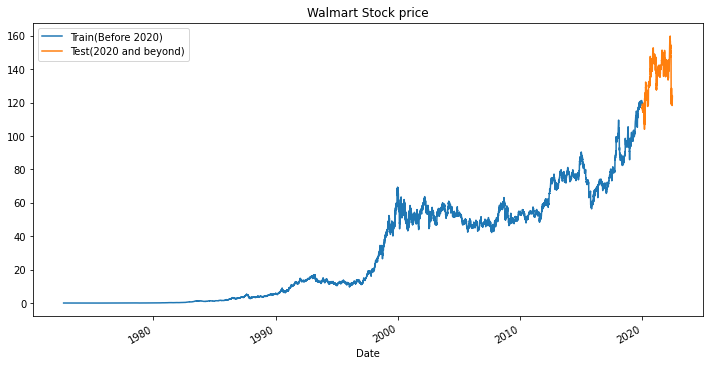

In [ ]:
## Train and test plot function
tstart = 1972
tend = 2019

def train_test_plot(dataset, tstart, tend):
  df.loc[f'{tstart}':f'{tend}', 'Close'].plot(figsize = (12,6), legend = True)
  df.loc[f'{tend+1}':,'Close'].plot(figsize = (12,6), legend = True)
  plt.legend([f'Train(Before {tend +1})', f'Test({tend+1} and beyond)'])
  plt.title('Walmart Stock price')
  plt.show()

train_test_plot(df, tstart, tend)

## Splitting the train and test data using function

In [ ]:
def train_test_split(dataset, tstart, tend):
  train = df.loc[f'{tstart}':f'{tend}', 'Close'].values
  test = df.loc[f'{tend+1}':,'Close'].values
  return train, test
training_set, test_set = train_test_split(df, tstart, tend)


## Scaling the data using minmax scaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
sc = MinMaxScaler(feature_range = (0,1))
training_set = training_set.reshape(-1,1)
training_set_scaled = sc.fit_transform(training_set)

## Creating input data

In [ ]:
training_set[0:60], training_set[60]

(array([[0.064453],
        [0.064209],
        [0.063477],
        [0.063477],
        [0.0625  ],
        [0.062988],
        [0.0625  ],
        [0.062988],
        [0.062744],
        [0.062256],
        [0.062744],
        [0.062744],
        [0.062744],
        [0.063232],
        [0.062744],
        [0.062988],
        [0.0625  ],
        [0.062012],
        [0.060059],
        [0.057861],
        [0.056152],
        [0.055908],
        [0.054688],
        [0.056152],
        [0.056885],
        [0.05957 ],
        [0.060547],
        [0.061768],
        [0.060059],
        [0.057617],
        [0.058594],
        [0.058594],
        [0.058838],
        [0.05835 ],
        [0.05835 ],
        [0.056885],
        [0.057861],
        [0.062012],
        [0.062256],
        [0.061768],
        [0.061523],
        [0.061768],
        [0.060547],
        [0.061035],
        [0.061279],
        [0.061035],
        [0.062988],
        [0.065918],
        [0.066406],
        [0.066162],


In [ ]:
def split_sequence(sequence,n_steps):
  X,y=list(),list()
  for i in range(len(sequence)):
    end_ix=i+ n_steps
    if end_ix >len(sequence)-1:
      break
    seq_x, seq_y, = sequence[i:end_ix], sequence[end_ix]
    X.append(seq_x)
    y.append(seq_y)
  return np.array(X), np.array(y)


n_steps=60
features =1 
# split into samples 
X_train, y_train=split_sequence(training_set_scaled, n_steps)

In [ ]:
## Reshaping X_train for model
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], features)

In [ ]:
X_train.shape

(11881, 60, 1)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, GRU, Bidirectional
from tensorflow.random import set_seed

set_seed(455)
np.random.seed(455)

In [ ]:
# The LSTM architecture
model_lstm = Sequential()

## RNN Layer
model_lstm.add(LSTM(units=150, activation="tanh", input_shape=(n_steps, features)))

## Output Layer
model_lstm.add(Dense(units=1))

# Compiling the model
model_lstm.compile(optimizer="RMSprop", loss="mse")

In [ ]:
## Fitting the model
model_lstm.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
372/372 [==============================] - 4s 7ms/step - loss: 0.0019
Epoch 2/50
372/372 [==============================] - 2s 7ms/step - loss: 3.6022e-04
Epoch 3/50
372/372 [==============================] - 2s 6ms/step - loss: 2.5913e-04
Epoch 4/50
372/372 [==============================] - 3s 7ms/step - loss: 1.9799e-04
Epoch 5/50
372/372 [==============================] - 4s 10ms/step - loss: 1.7502e-04
Epoch 6/50
372/372 [==============================] - 4s 11ms/step - loss: 1.4518e-04
Epoch 7/50
372/372 [==============================] - 4s 12ms/step - loss: 1.2875e-04
Epoch 8/50
372/372 [==============================] - 4s 12ms/step - loss: 1.1799e-04
Epoch 9/50
372/372 [==============================] - 3s 9ms/step - loss: 1.0342e-04
Epoch 10/50
372/372 [==============================] - 2s 6ms/step - loss: 9.7959e-05
Epoch 11/50
372/372 [==============================] - 2s 6ms/step - loss: 9.4383e-05
Epoch 12/50
372/372 [==============================] - 2s 7ms/s

## Predicting the values on Test set

In [ ]:
df_total = df.loc[:,"Close"]
inputs = df_total[len(df_total) - len(test_set) - n_steps :].values
print(type(input))

<class 'method'>


In [ ]:
df_total[len(df_total) - len(test_set) - n_steps :].head()

Date
2019-10-07    117.230003
2019-10-08    117.580002
2019-10-09    118.930000
2019-10-10    119.610001
2019-10-11    120.239998
Name: Close, dtype: float64

In [ ]:
inputs[:5]

array([117.230003, 117.580002, 118.93    , 119.610001, 120.239998])

In [ ]:
inputs = inputs.reshape(-1, 1)

#scaling
inputs = sc.transform(inputs)

# Split into samples
X_test, y_test = split_sequence(inputs, n_steps)

# reshape
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], features)

#prediction
predicted_stock_price = model_lstm.predict(X_test)

#inverse transform the values
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

20/20 [==============================] - 0s 3ms/step


In [ ]:
def plot_predictions(test, predicted):
    plt.plot(test, color="gray", label="Real")
    plt.plot(predicted, color="red", label="Predicted")
    plt.title("Walmart Stock Price Prediction")
    plt.xlabel("Time")
    plt.ylabel("Walmart Stock Price")
    plt.legend()
    plt.show()


def return_rmse(test, predicted):
    rmse = np.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {:.2f}.".format(rmse))

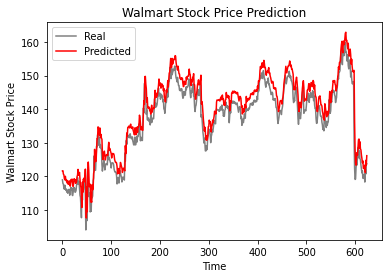

In [ ]:
plot_predictions(test_set,predicted_stock_price)

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
return_rmse(test_set,predicted_stock_price)

The root mean squared error is 3.70.


## Bidirection LSTM

In [ ]:
model_bid = Sequential()
model_bid.add(Bidirectional(LSTM(units=150, activation="tanh", input_shape=(n_steps, features))))
model_bid.add(Dense(units=1))
# Compiling the RNN
model_bid.compile(optimizer="RMSprop", loss="mse")


In [ ]:
model_bid.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
372/372 [==============================] - 7s 11ms/step - loss: 0.0014
Epoch 2/50
372/372 [==============================] - 4s 11ms/step - loss: 3.9346e-04
Epoch 3/50
372/372 [==============================] - 4s 10ms/step - loss: 2.8525e-04
Epoch 4/50
372/372 [==============================] - 4s 10ms/step - loss: 2.2727e-04
Epoch 5/50
372/372 [==============================] - 4s 10ms/step - loss: 2.0298e-04
Epoch 6/50
372/372 [==============================] - 4s 10ms/step - loss: 1.7293e-04
Epoch 7/50
372/372 [==============================] - 4s 11ms/step - loss: 1.5495e-04
Epoch 8/50
372/372 [==============================] - 4s 11ms/step - loss: 1.4011e-04
Epoch 9/50
372/372 [==============================] - 4s 11ms/step - loss: 1.2251e-04
Epoch 10/50
372/372 [==============================] - 4s 10ms/step - loss: 1.1425e-04
Epoch 11/50
372/372 [==============================] - 4s 10ms/step - loss: 1.1237e-04
Epoch 12/50
372/372 [==============================] - 4

20/20 [==============================] - 1s 4ms/step


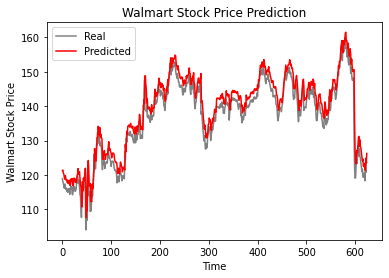

In [ ]:
BID_predicted_stock_price = model_bid.predict(X_test)
BID_predicted_stock_price = sc.inverse_transform(BID_predicted_stock_price)
plot_predictions(test_set, BID_predicted_stock_price)

In [ ]:
return_rmse(test_set,BID_predicted_stock_price)

The root mean squared error is 3.22.


## GRU Model

In [ ]:
model_gru = Sequential()
model_gru.add(GRU(units=150, activation="tanh", input_shape=(n_steps, features)))
model_gru.add(Dense(units=1))
# Compiling the RNN
model_gru.compile(optimizer="RMSprop", loss="mse")

model_gru.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_1 (GRU)                 (None, 150)               68850     
                                                                 
 dense_5 (Dense)             (None, 1)                 151       
                                                                 
Total params: 69,001
Trainable params: 69,001
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_gru.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
372/372 [==============================] - 4s 6ms/step - loss: 0.0012
Epoch 2/50
372/372 [==============================] - 2s 6ms/step - loss: 2.6176e-04
Epoch 3/50
372/372 [==============================] - 2s 6ms/step - loss: 1.9862e-04
Epoch 4/50
372/372 [==============================] - 2s 6ms/step - loss: 1.6018e-04
Epoch 5/50
372/372 [==============================] - 2s 6ms/step - loss: 1.4051e-04
Epoch 6/50
372/372 [==============================] - 2s 6ms/step - loss: 1.2110e-04
Epoch 7/50
372/372 [==============================] - 2s 6ms/step - loss: 1.0901e-04
Epoch 8/50
372/372 [==============================] - 2s 6ms/step - loss: 1.0071e-04
Epoch 9/50
372/372 [==============================] - 2s 6ms/step - loss: 9.3406e-05
Epoch 10/50
372/372 [==============================] - 2s 6ms/step - loss: 8.7843e-05
Epoch 11/50
372/372 [==============================] - 2s 6ms/step - loss: 8.4261e-05
Epoch 12/50
372/372 [==============================] - 2s 6ms/step 

20/20 [==============================] - 0s 3ms/step


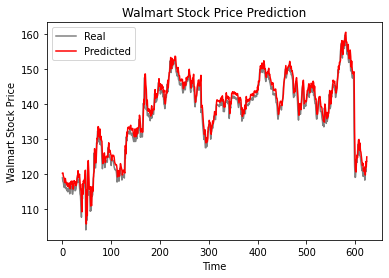

In [ ]:
GRU_predicted_stock_price = model_gru.predict(X_test)
GRU_predicted_stock_price = sc.inverse_transform(GRU_predicted_stock_price)
plot_predictions(test_set, GRU_predicted_stock_price)

In [ ]:
return_rmse(test_set,GRU_predicted_stock_price)

The root mean squared error is 2.43.


## The best model is GRU with rmse 2.43